# Lecture 2, Solving ODE's

There are a number of question marks "?" throughout the markdown section of this notebook. You are responsible for filling those sections in. 

**Overview:**
* Solving initial value problems, a simple example
* Survey of methods.
* Errors and numerical stability
    * Reading: Newman chapter 4.

**Next Lecture:** Solving systems of coupled ODE's and Newtons 2nd law.

---

## Simple Example, an RC circuit. 
We have a simple RC circuit, as shown below. After a long charge with the switch in position 1 it is flipped to position 2. What is the time dependence of the charge across $C$?

![RC circuit](./figs/Lecture2_circuit.png)











Using Kirchoff's laws, determine the 1st order ODE we need to solve for $Q(t)$:

$$\frac{dQ}{dt} = -\frac{Q}{RC}$$

What is the closed form solution of this equation:
$$ Q(t) = Q_{0}e^{\frac{-t}{RC}} $$

In this case the problem was easy to solve. However, there are many cases of such problems, formulated as ordinary differential equations, where the solution is not so easy (or even impossible) to find. So how might we approximate the solution to this problem and solve numerically?

An obvious thing to try is to Taylor expand $Q(t)$ for small $\Delta t$ around $t=0$

$$ Q(\Delta t) = Q(0) + \frac{dQ}{dt}\Delta t + \frac{1}{2}\frac{d^2Q}{dt^2}(\Delta t)^2 + \dots $$

If $\Delta t$ is very small, then it is usually a good approximation to ignore terms that involve second and higher powers of $\Delta t$

$$ Q(\Delta t) \approx Q(0) + \frac{dQ}{dt}\Delta t$$

and we know the functional form of the derivative. It is given by the original ODE! We now have:

$$ Q(t + \Delta t) \approx Q(t) - \frac{Q}{RC} \Delta t $$

This is the general strategy for solving ODE's on a computer. By Taylor expanding we have taken a problem defined on a continuous variable $t$, and transformed it to an approximate problem defined on a discrete variable $\Delta t$. This is always necessary since computers only operate on discrete quantities.

---

## Methods for ODE's

To understand our approximate methods, we work with a single ordinary differential equation.
$$\frac{dx}{dt}=g(x,t)$$
where $x(t)$ is the solution we seek and $g(x,t)$ is a well-behaved but otherwise arbitrary function.

If we know $x(t)$ we could determine $g(t+\Delta t)$ from the Taylor series:
$$x(t+\Delta t) = x(t) + \frac{dx}{dt}\Delta t + \frac{d^2x}{dt^2}\frac{(\Delta t)^2}{2!} + \frac{d^3x}{dt^3}\frac{\Delta t^2}{3!} + \dots$$

## Euler's method

$$x(t_{n+1}) = x(t_{n}) + g(x_n,t_n)\Delta t +O[(\Delta t)^2].$$

where $x_n$ is the the value of our solution at time point $t_n$ and discrete step $n$.

## Improved accuracy: Runge-Kutta methods

### RK2:

$$
\begin{align}
k_1 &= \Delta t g(x_n, t_n)\\
k_2 &= \Delta t g(x_n+1/2k_1, t_n+\Delta t/2)\\
x(t_{n+1}) &= x(t_n) + k_2
\end{align}
$$


### RK4:

$$
\begin{align}
k_1 &= \Delta t g(x_n, t_n)\\
k_2 &= \Delta t g(x_n+1/2k_1, t_n+\Delta t/2)\\
k_3 &= \Delta t g(x_n+1/2k_2, t_n+\Delta t/2)\\
k_4 &= \Delta t g(x_n+k_3, t_n+\Delta t)\\
x(t_{n+1}) &= x(t_n) + \frac{1}{6}(k_1+2k_2+2k_3+k_4)
\end{align}
$$

***
## Pseudocode (for all methods):
### Initialization
* Assign initial values and constants: $x\left(0\right)$, $\Delta t$, any constants in $g(x,t)$.
* Set the number of time steps and the initial value of time.

### Calculation
* At time step $x_i$, calculate $x_{i+1}$ and $t_{i+1}$ at step $i+1$.
* Increase to $t_i$ to the next time step $t_{i+1} = t_i + \Delta t$.
* repeat for $n-1$ time steps.

### Analysis
* store the values for $x_i$ and $t_i$ in a file. 
* plot results or use in subsequent calculation.

***

# Exercise

1. Define a function for the exact solution of our simple RC circuit, $Q(t)$. This will be used to test the accuracy of our numerical methods. Plot $Q(t)$ for a fixed $RC$.

2. Define another function to find the solution of our differential equation numerically using an RK2 method.

3. Using the functions in 1 and 2, plot the exact and approximate solutions over-top of each other for the range of time from $t$ = 0 to 10, and using the parameters: $R=1$, $C=1$, $Q_0=1$, and $\Delta t$ = 0.1 .

4. Finally, create a function to calculate and then plot the total cumulative error of our approximate solution as a function of the step size $\Delta t$ from $\Delta t$ = 0.001 to 10 over a time from $t$ = 0 to 10. How does this plot change with increasing final time?



**You will find some starter code in the cells below**


In [48]:
# it is good practice to include all import statements in the first code cell at the top of your workbook or script.
import numpy as np
import matplotlib.pyplot as plt

# this is a so called "magic" function that allows for interactive plotting, 
# you will see below when we plot the results
%matplotlib inline

In [43]:
#  Modify this function to output the exact solution for Q(t) from above
# Q0 and t0 are the initial charge and time

# Note the default argument for t0 = 0. Using this means we only have to pass a value for t0 to the function
# if we want something different from 0

def exact(t, R, C, Q0, t0 =0.0):
    # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! exact solution here  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    Q = Q0*np.exp(-t/(R*C))
    return Q

def Q_exact(dt, t_final, R, C, Q0, t0=0.0):
    
    Q_list = []
    t_list = []
    
    n = int(t_final/dt)
    
    for i in range(n):
        t_list.append(i * dt)
        Q_list.append(exact(i * dt, R, C, Q0, t0))
        
    return t_list, Q_list

In [44]:
# Modify this function to implement an RK2 method for our RC circuit ODE

# note the template here is for one way to do this, and not necessarily the best way.
# I encourage you to try and think of a better and more general way to write this Euler method function.

def g_function(Q):
    return -(Q/(R*C))

def approx_rk2(dt, t_final, R, C, Q0, t0=0.0):
    
    #initialize some empty lists to store our data and time steps
    Q_list = []
    t_list = []
    
    # number of time steps, nust be an integer
    n  = int(t_final/dt) 
    
    # the main loop over all time steps
    for ii in range(n):
        if ii == 0.0:
            # set initial conditions at time zero
            Q = Q0
            t = t0
        else :
            # !!!!!!!!!!!!!!!!!!!!!!   RK2 method here  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            
            Q = Q_list[ii-1]
            
            k1 = dt * g_function(Q)
            k2 = dt * g_function(Q + 0.5*k1)
            
            # update value of Q at each time step and step time by dt
            Q+= k2
            t+= dt
            
            
        # use append to add on to the end of a list
        Q_list.append(Q)
        t_list.append(t)
    
    # we turn the lists into numpy arrays before returning
    
    Q_list = np.array(Q_list)
    t_list = np.array(t_list)
    
    return t_list, Q_list

In [45]:
# Define our constants
Q0, t0 = 10, 0.0
t_final, dt = 10, 0.1
R, C = 1, 1 

#create an array with 1000 equally spaced points spanning t0 to _final to pass to our exact expression
t = np.linspace(t0,t_final,100) 

# Calculate the exact solution
t_ex, Q_ex = Q_exact(dt, t_final, R, C, Q0, t0=0.0)
print(t_ex)
print(Q_ex)


#Call our  approximate function, this returns function values and time points 
t_approx, Q_approx = approx_rk2(dt, t_final, R, C, Q0, t0=0.0)
print(t_approx)
print(Q_approx)

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4000000000000001, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9000000000000001, 2.0, 2.1, 2.2, 2.3000000000000003, 2.4000000000000004, 2.5, 2.6, 2.7, 2.8000000000000003, 2.9000000000000004, 3.0, 3.1, 3.2, 3.3000000000000003, 3.4000000000000004, 3.5, 3.6, 3.7, 3.8000000000000003, 3.9000000000000004, 4.0, 4.1000000000000005, 4.2, 4.3, 4.4, 4.5, 4.6000000000000005, 4.7, 4.800000000000001, 4.9, 5.0, 5.1000000000000005, 5.2, 5.300000000000001, 5.4, 5.5, 5.6000000000000005, 5.7, 5.800000000000001, 5.9, 6.0, 6.1000000000000005, 6.2, 6.300000000000001, 6.4, 6.5, 6.6000000000000005, 6.7, 6.800000000000001, 6.9, 7.0, 7.1000000000000005, 7.2, 7.300000000000001, 7.4, 7.5, 7.6000000000000005, 7.7, 7.800000000000001, 7.9, 8.0, 8.1, 8.200000000000001, 8.3, 8.4, 8.5, 8.6, 8.700000000000001, 8.8, 8.9, 9.0, 9.1, 9.200000000000001, 9.3, 9.4, 9.5, 9.600000000000001, 9.700000000000

Text(0, 0.5, 'Capacitor charge (units)')

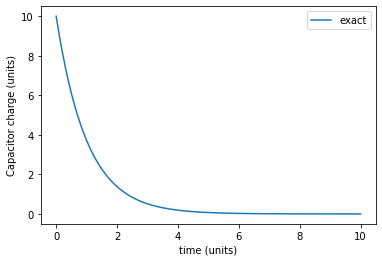

In [46]:
# Generate plots 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, Q_ex, linestyle = '-', label = "exact")

# plot approximate solution (use discrete points with no connecting line)
ax.plot()

plt.legend()
plt.xlabel("time (units)")
plt.ylabel("Capacitor charge (units)")

In [ ]:
# Write a function to calculate the cumulative error
# hint, try reading the help file on np.sum

def cumulative_error(dt, t_final, R, C, Q0):
    # error = abs(approximate - exact)

In [ ]:
import numpy as np
a = np.array([1,2,3,4])
b = np.sum(a)
print(b)

In [ ]:
plt.figure()
plt.plot([1,2,3],[1,2,3])
plt.show()
